# Cargamos el fichero de datos en un DataFrame

In [32]:
import pandas as pd

df=pd.read_csv("data/train.csv",sep=",")
df.head()

Unnamed: 0 countryName                  eprtrSectorName  \
0           0     Germany                 Mineral industry   
1           1       Italy                 Mineral industry   
2           2       Spain  Waste and wastewater management   
3           3     Czechia                    Energy sector   
4           4     Finland  Waste and wastewater management   

                        EPRTRAnnexIMainActivityLabel  \
0  Installations for the production of cement cli...   
1  Installations for the production of cement cli...   
2  Landfills (excluding landfills of inert waste ...   
3  Thermal power stations and other combustion in...   
4                 Urban waste-water treatment plants   

                                   FacilityInspireID  \
0  https://registry.gdi-de.org/id/de.ni.mu/062217...   
1                         IT.CAED/240602021.FACILITY   
2                         ES.CAED/001966000.FACILITY   
3                    CZ.MZP.U422/CZ34736841.FACILITY   
4  http://paikkatiedot.fi/so/1002031/pf/Productio...   

                                        facilityName                  City  \
0               Holcim (Deutschland) GmbH Werk Höver                Sehnde   
1               Stabilimento di Tavernola Bergamasca  TAVERNOLA BERGAMASCA   
2                  COMPLEJO MEDIOAMBIENTAL DE ZURITA    PUERTO DEL ROSARIO   
3                                Elektrárny Prunéřov                 Kadaň   
4  TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄT...               Tampere   

  targetRelease              pollutant  reportingYear  ...  CONTINENT  \
0           AIR   Carbon dioxide (CO2)           2015  ...     EUROPE   
1           AIR  Nitrogen oxides (NOX)           2018  ...     EUROPE   
2           AIR          Methane (CH4)           2019  ...     EUROPE   
3           AIR  Nitrogen oxides (NOX)           2012  ...     EUROPE   
4           AIR          Methane (CH4)           2018  ...     EUROPE   

   max_wind_speed avg_wind_speed  min_wind_speed   max_temp   avg_temp  \
0       15.118767      14.312541       21.419106   2.864895   4.924169   
1       19.661550      19.368166       21.756389   5.462839   7.864403   
2       12.729453      14.701985       17.103930   1.511201   4.233438   
3       11.856417      16.122584       17.537184  10.970301  10.298348   
4       17.111930      20.201604       21.536012  11.772039  11.344078   

    min_temp  DAY WITH FOGS     REPORTER NAME  \
0   9.688206              2  Mr. Jacob Ortega   
1  12.023521              1    Ashlee Serrano   
2   8.632193              2      Vincent Kemp   
3  15.179215              0        Carol Gray   
4  16.039004              2        Blake Ford   

                            CITY ID  
0  7cdb5e74adcb2ffaa21c1b61395a984f  
1  cd1dbabbdba230b828c657a9b19a8963  
2  5011e3fa1436d15b34f1287f312fbada  
3  37a6d7a71c4f7c2469e4f01b70dd90c2  
4  471fe554e1c62d1b01cc8e4e5076c61a  

[5 rows x 22 columns]

## Vemos los datos y analizamos para limpiarlos

In [330]:
df.shape

(20127, 22)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20127 entries, 0 to 20126
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    20127 non-null  int64  
 1   countryName                   20127 non-null  object 
 2   eprtrSectorName               20127 non-null  object 
 3   EPRTRAnnexIMainActivityLabel  20127 non-null  object 
 4   FacilityInspireID             20127 non-null  object 
 5   facilityName                  20127 non-null  object 
 6   City                          20127 non-null  object 
 7   targetRelease                 20127 non-null  object 
 8   pollutant                     20127 non-null  object 
 9   reportingYear                 20127 non-null  int64  
 10  MONTH                         20127 non-null  int64  
 11  DAY                           20127 non-null  int64  
 12  CONTINENT                     20127 non-null  object 
 13  m

Nombres de las columnas iniciales:

In [332]:
df.keys()

Index(['Unnamed: 0', 'countryName', 'eprtrSectorName',
       'EPRTRAnnexIMainActivityLabel', 'FacilityInspireID', 'facilityName',
       'City', 'targetRelease', 'pollutant', 'reportingYear', 'MONTH', 'DAY',
       'CONTINENT', 'max_wind_speed', 'avg_wind_speed', 'min_wind_speed',
       'max_temp', 'avg_temp', 'min_temp', 'DAY WITH FOGS', 'REPORTER NAME',
       'CITY ID'],
      dtype='object')

Tipos de contaminantes que tenemos en los datos (éste será nuestro target):

In [333]:
df.pollutant.unique()

array(['Carbon dioxide (CO2)', 'Nitrogen oxides (NOX)', 'Methane (CH4)'],
      dtype=object)

### Preparamos el conjunto de datos de entrada

Transformaciones en el conjunto de datos de entrada:
1. Eliminamos columnas innecesarias (no se puede aprender nada de ellas)
2. Pasamos la columna del target (pollutant) de variables categóricas a numéricas (one-hot encoding)

In [33]:
def prepare_data(df):
    df.drop("Unnamed: 0",axis=1,inplace=True)
    df.drop("CONTINENT",axis=1,inplace=True)
    df.drop("targetRelease",axis=1,inplace=True)
    df['pollutant'].replace(['Nitrogen oxides (NOX)','Carbon dioxide (CO2)',"Methane (CH4)"],[0,1,2], inplace=True)
    if not df['pollutant'].isin([0,1,2]).all():
        raise Exception("pollutant contains invalid values")
    (x,y) = df.shape
    if y != 19:
        raise Exception("Dataframe contains incorrect number of columns")
    return df

In [34]:
df = prepare_data(df)

In [35]:
df.head()

countryName                  eprtrSectorName  \
0     Germany                 Mineral industry   
1       Italy                 Mineral industry   
2       Spain  Waste and wastewater management   
3     Czechia                    Energy sector   
4     Finland  Waste and wastewater management   

                        EPRTRAnnexIMainActivityLabel  \
0  Installations for the production of cement cli...   
1  Installations for the production of cement cli...   
2  Landfills (excluding landfills of inert waste ...   
3  Thermal power stations and other combustion in...   
4                 Urban waste-water treatment plants   

                                   FacilityInspireID  \
0  https://registry.gdi-de.org/id/de.ni.mu/062217...   
1                         IT.CAED/240602021.FACILITY   
2                         ES.CAED/001966000.FACILITY   
3                    CZ.MZP.U422/CZ34736841.FACILITY   
4  http://paikkatiedot.fi/so/1002031/pf/Productio...   

                                        facilityName                  City  \
0               Holcim (Deutschland) GmbH Werk Höver                Sehnde   
1               Stabilimento di Tavernola Bergamasca  TAVERNOLA BERGAMASCA   
2                  COMPLEJO MEDIOAMBIENTAL DE ZURITA    PUERTO DEL ROSARIO   
3                                Elektrárny Prunéřov                 Kadaň   
4  TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄT...               Tampere   

   pollutant  reportingYear  MONTH  DAY  max_wind_speed  avg_wind_speed  \
0          1           2015     10   20       15.118767       14.312541   
1          0           2018      9   21       19.661550       19.368166   
2          2           2019      2    4       12.729453       14.701985   
3          0           2012      8    6       11.856417       16.122584   
4          2           2018     12   22       17.111930       20.201604   

   min_wind_speed   max_temp   avg_temp   min_temp  DAY WITH FOGS  \
0       21.419106   2.864895   4.924169   9.688206              2   
1       21.756389   5.462839   7.864403  12.023521              1   
2       17.103930   1.511201   4.233438   8.632193              2   
3       17.537184  10.970301  10.298348  15.179215              0   
4       21.536012  11.772039  11.344078  16.039004              2   

      REPORTER NAME                           CITY ID  
0  Mr. Jacob Ortega  7cdb5e74adcb2ffaa21c1b61395a984f  
1    Ashlee Serrano  cd1dbabbdba230b828c657a9b19a8963  
2      Vincent Kemp  5011e3fa1436d15b34f1287f312fbada  
3        Carol Gray  37a6d7a71c4f7c2469e4f01b70dd90c2  
4        Blake Ford  471fe554e1c62d1b01cc8e4e5076c61a

In [337]:
df.shape

(20127, 19)

### Miramos la correlación entre distintas variables

Analizamos la correlación del target (pollutant) con las variables (numéricas):

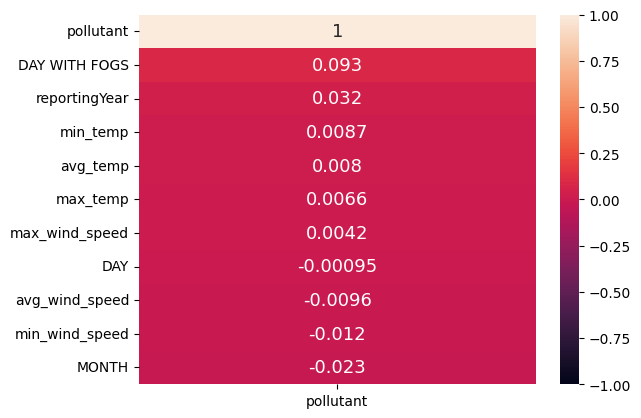

In [39]:
import seaborn as sns

sns.heatmap(df.corr()[['pollutant']].sort_values(by='pollutant', ascending=False), vmin=-1, vmax=1, annot=True, annot_kws={"size":13})
plt.savefig('./img/correlacion.png')

Analizamos la correlación entre las distintas variables numéricas entre sí (para ver si puede haber redundancias):

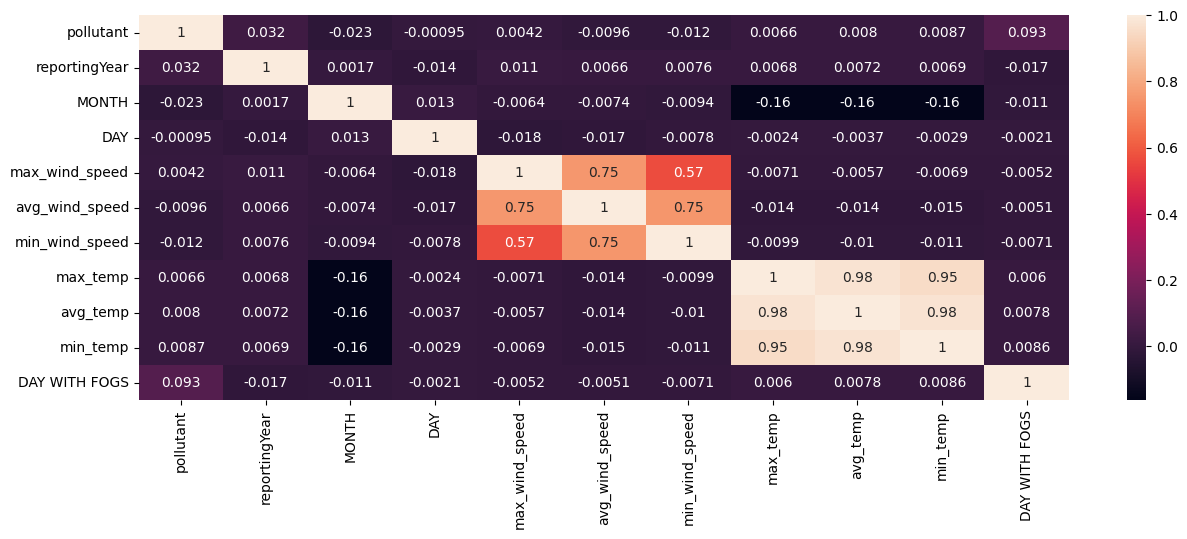

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

corr = df.corr()
sns.heatmap(corr, annot=True)
plt.savefig('./img/heatmap.png')

In [380]:
from sklearn.model_selection import train_test_split

X = df[["eprtrSectorName", 'EPRTRAnnexIMainActivityLabel', "avg_wind_speed", 'avg_temp', 'min_temp', 'min_wind_speed', 'max_temp', 'max_wind_speed', 'countryName', "DAY WITH FOGS", 'MONTH', 'reportingYear']]
y = df["pollutant"]
X = pd.get_dummies(X)
X = pd.get_dummies(X, columns=['MONTH', 'reportingYear'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Matrix de Pearson

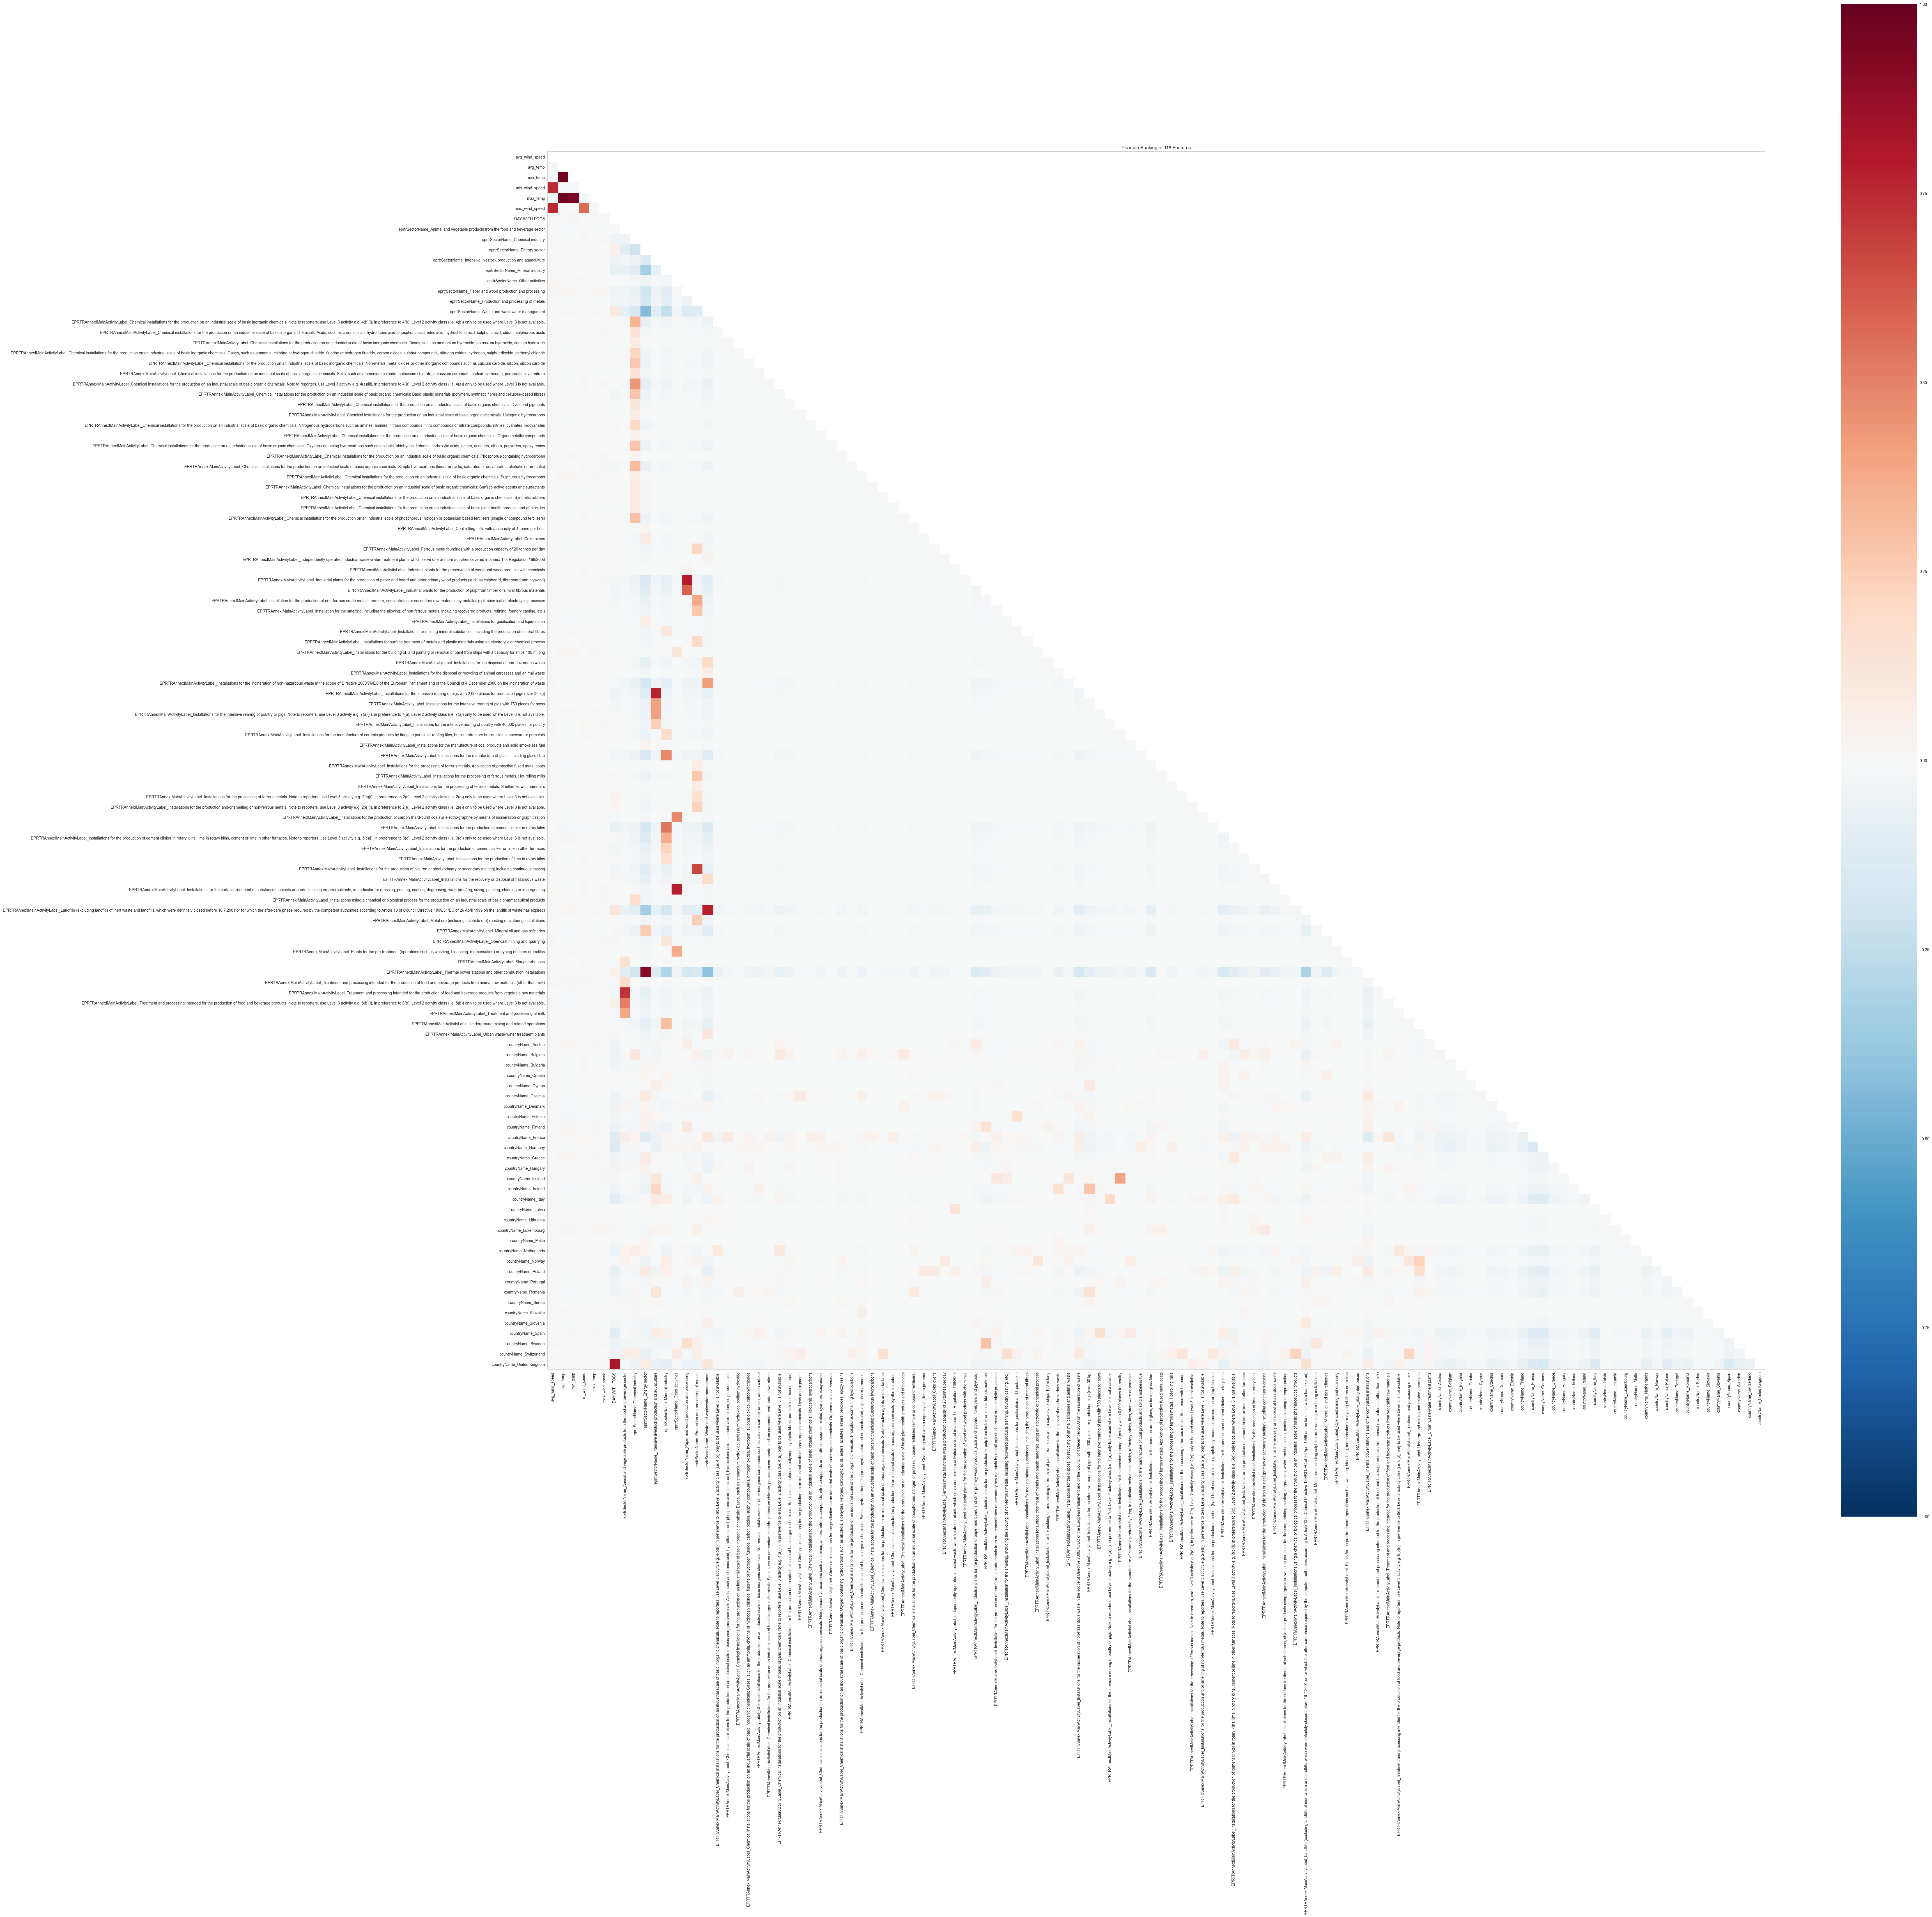

<Figure size 800x550 with 0 Axes>

In [41]:
from yellowbrick.features import Rank2D

plt.figure(figsize=(70, 70))

visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X_train, y_train)           
visualizer.transform(X)        
visualizer.show();

Vemos que no hay ninguna relación fuerte con ninguna de las variables.

# Creamos un árbol de decisión

In [381]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=15, random_state=0, min_samples_leaf=30)
tree.fit(X_train, y_train);

In [382]:
y_hat = tree.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_hat)
f1_s = f1_score(y_true=y_test, y_pred=y_hat, average='macro')

print('Primer modelo entrenado (árbol de decisión)')
print(f'Accuracy: {acc}')
print(f'F1 Score: {f1_s}')

Primer modelo entrenado (árbol de decisión)
Accuracy: 0.6068057625434674
F1 Score: 0.5921869309655613


## Utilizamos el árbol de decisión para ver la importancia de las distintas features del modelo

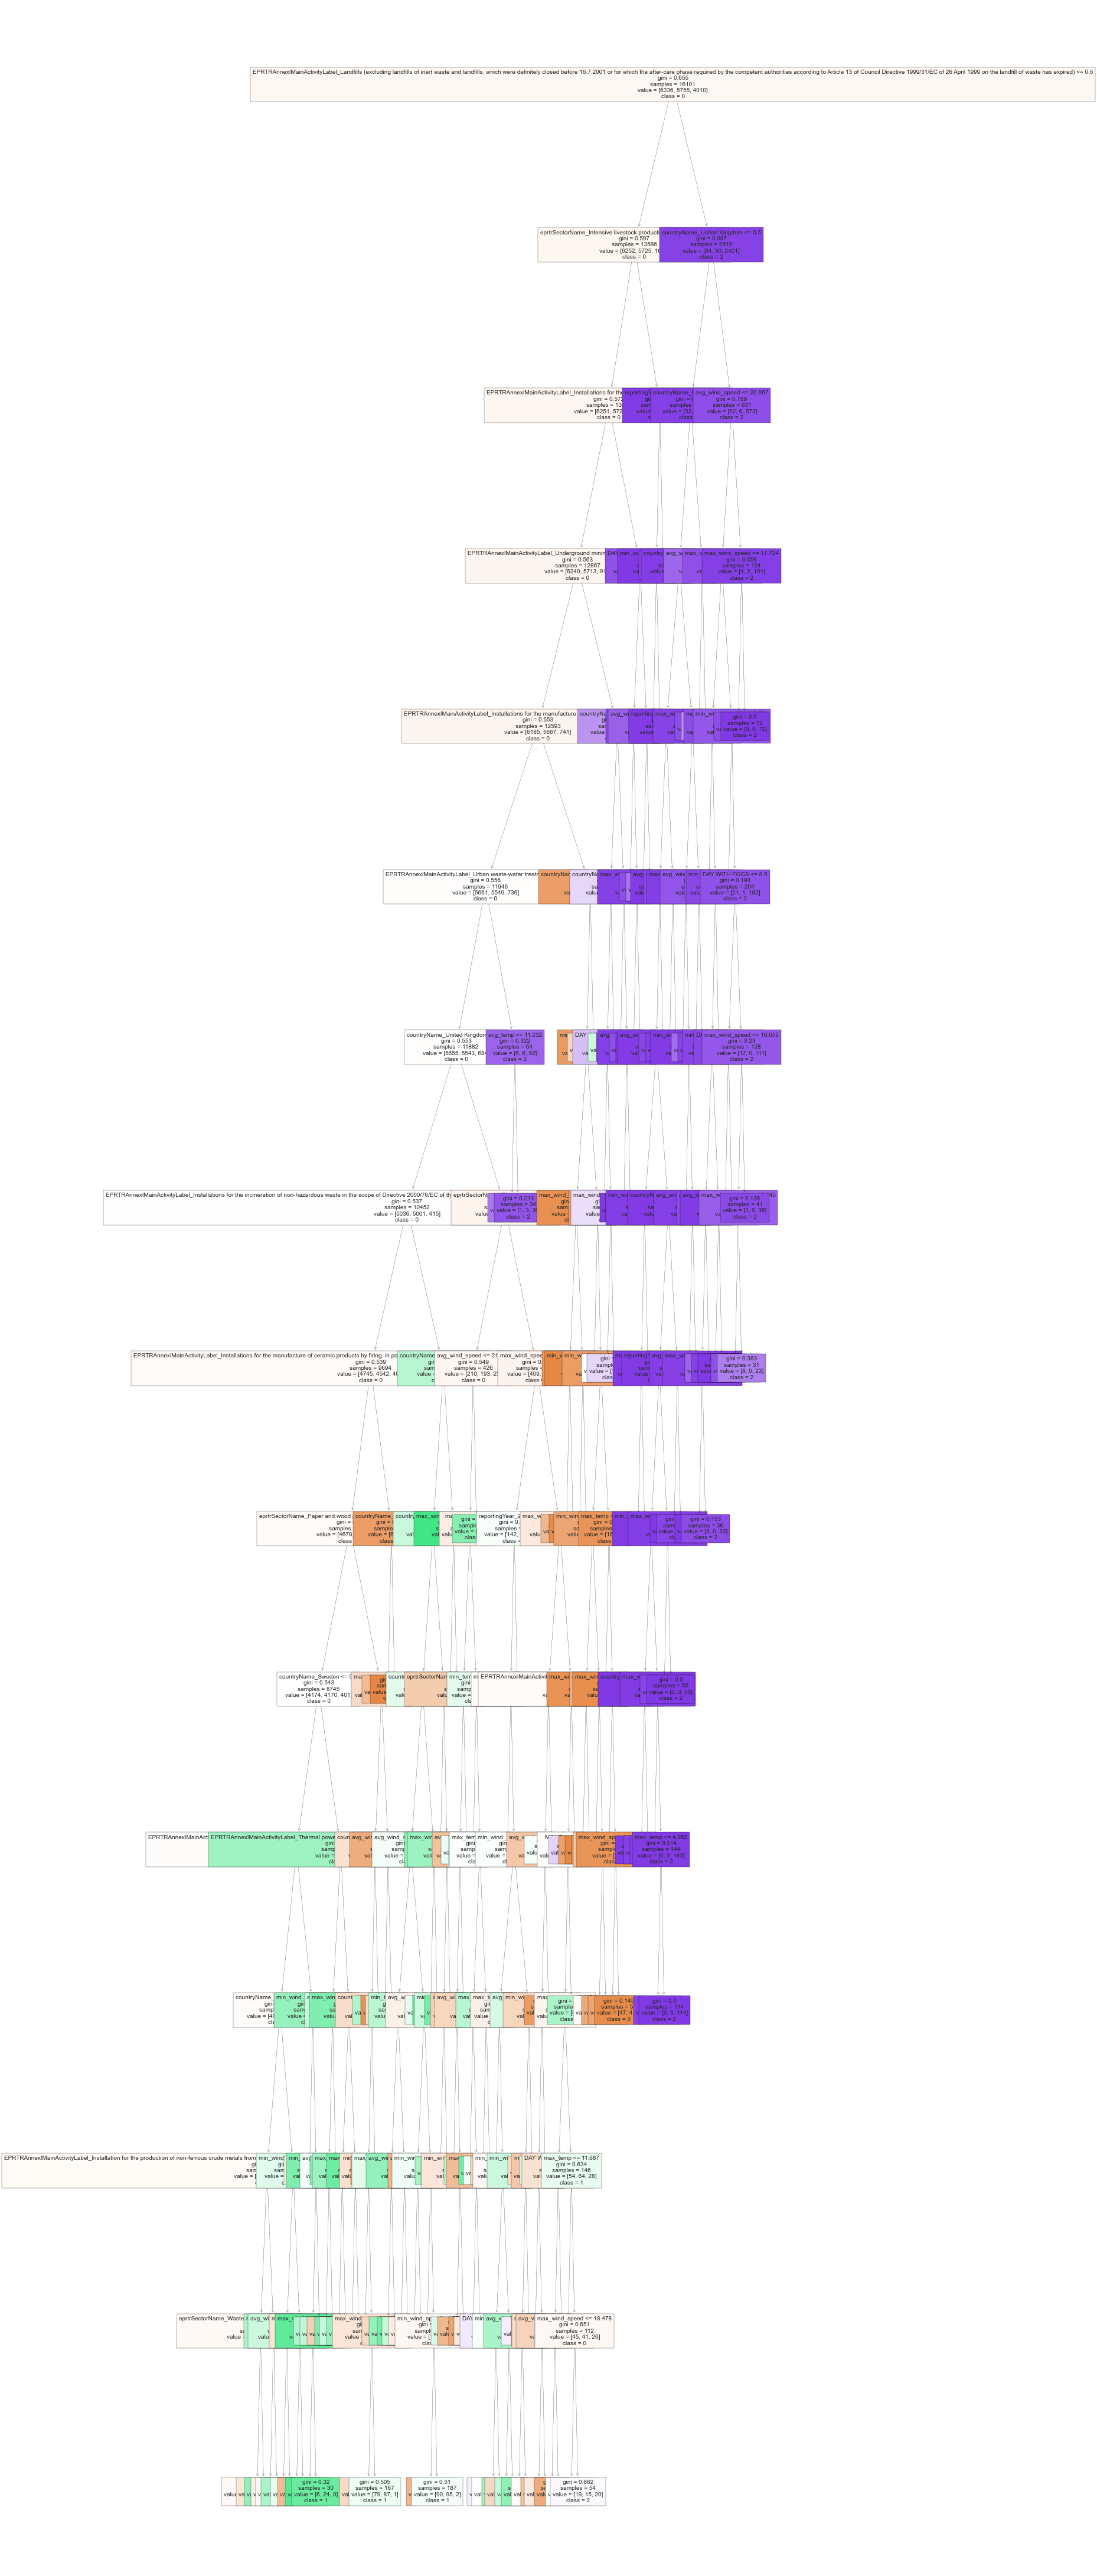

In [383]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 80))
plot_tree(tree, feature_names=X_train.columns, class_names=['0','1','2'], filled=True, fontsize=10);

c:\users\rocio\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


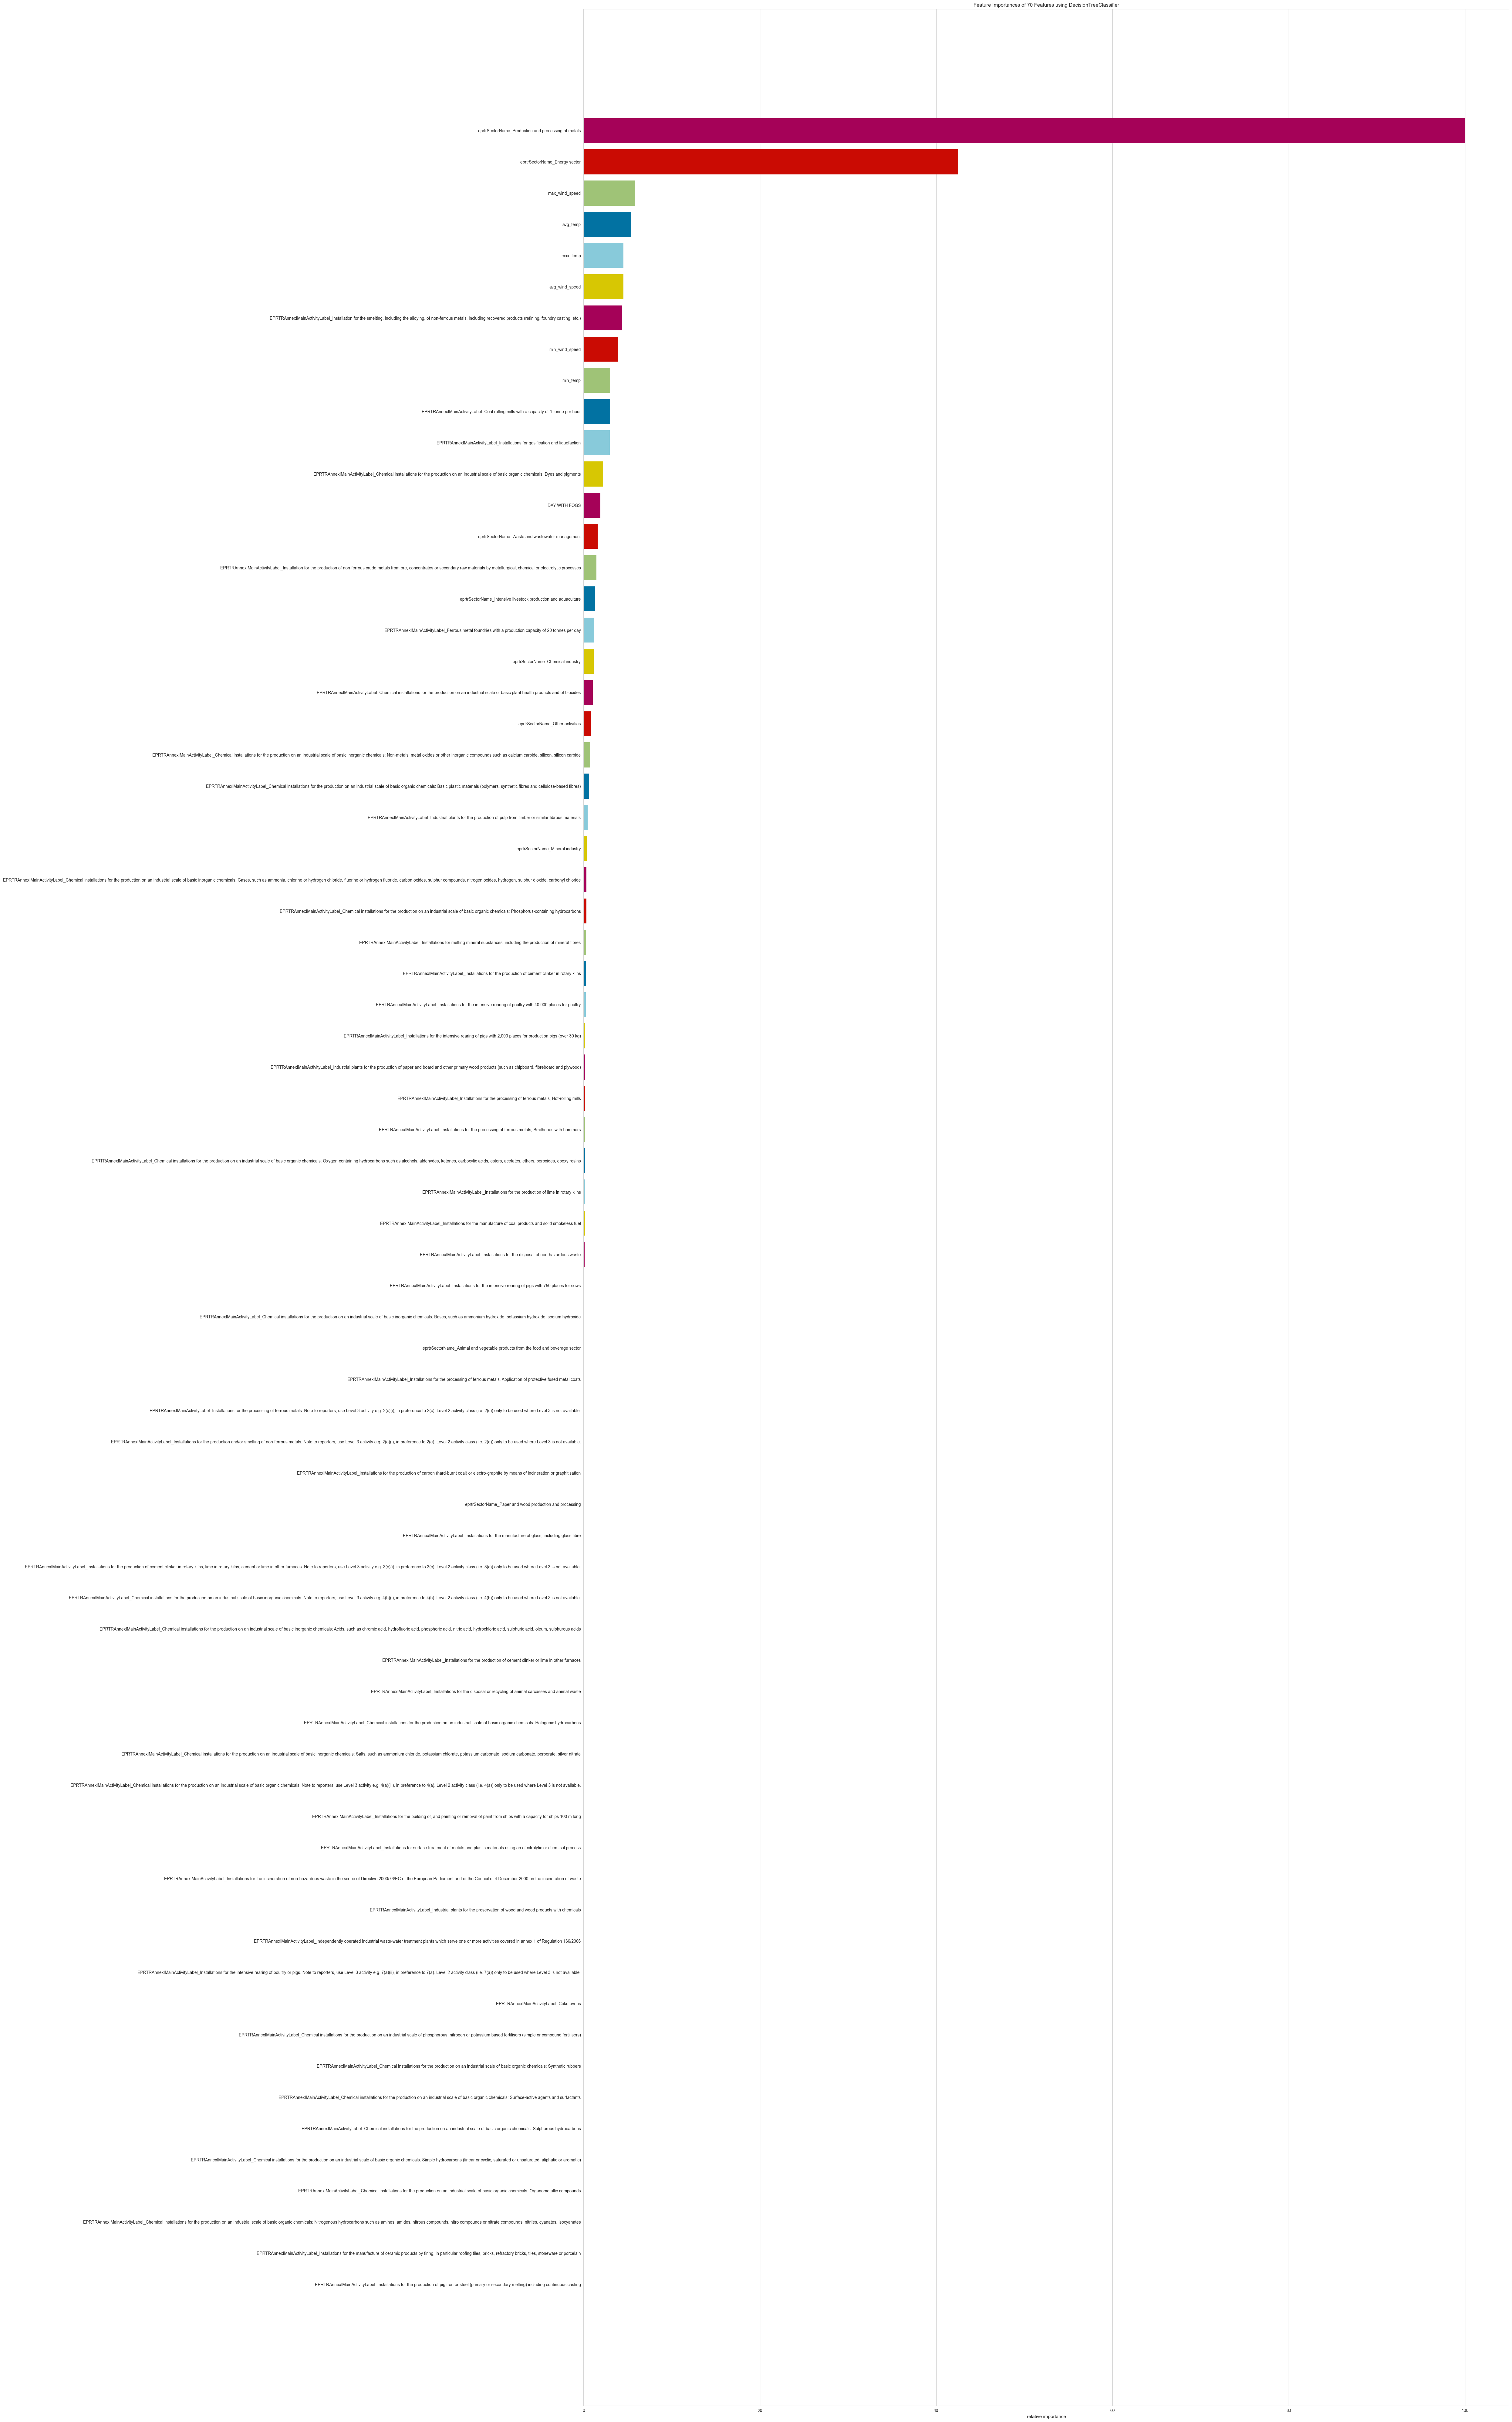

<Figure size 800x550 with 0 Axes>

In [42]:
from yellowbrick.model_selection import FeatureImportances

plt.figure(figsize=(50, 80))

viz = FeatureImportances(tree)
viz.fit(X_train, y_train)
viz.show()
plt.savefig('./img/featureimportances.png')

Vemos que las variables de año y mes no tienen demasiada importance, mientras que los paises y determinadas industrias sí permiten clasificar mucho mejor. Vamos a ajustar el conjunto de features que utilizaremos para el entrenamiento de varios modelos.

## Definimos variables para entrenar y probar nuestro modelo

In [27]:
from sklearn.model_selection import train_test_split
X = df[["eprtrSectorName", 'EPRTRAnnexIMainActivityLabel', "avg_wind_speed", 'avg_temp', 'min_temp', 'min_wind_speed', 'max_temp', 'max_wind_speed', 'countryName', "DAY WITH FOGS"]]
y = df["pollutant"]
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Probamos un SVM lineal

In [386]:
from sklearn.svm import LinearSVC

svc1 = LinearSVC(C=2, loss='hinge', max_iter=5000)
svc1.fit(X_train, y_train);

/Users/jagudo/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [392]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_hat = svc1.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_hat)
f1_s = f1_score(y_true=y_test, y_pred=y_hat, average='macro')

print('Primer modelo entrenado (SVM lineal)')
print(f'Accuracy: {acc}')
print(f'F1 Score: {f1_s}')

Primer modelo entrenado (SVM lineal)
Accuracy: 0.6065573770491803
F1 Score: 0.6368733824363133


### Creamos el fichero de soluciones generado por nuestro modelo para enviar a Kaggle

In [397]:
def generate_submision_df(columns):
    df_test = pd.read_csv('data/test.csv',sep=",")
    X_sub = df_test[["eprtrSectorName", 'EPRTRAnnexIMainActivityLabel', "avg_wind_speed", 'avg_temp', 'min_temp', 'min_wind_speed', 'max_temp', 'max_wind_speed', 'countryName', "DAY WITH FOGS"]]
    X_sub = pd.get_dummies(X_sub)
    X_sub["EPRTRAnnexIMainActivityLabel_Chemical installations for the production on an industrial scale of basic organic chemicals: Organometallic compounds"] = 0
    X_sub["EPRTRAnnexIMainActivityLabel_Chemical installations for the production on an industrial scale of basic organic chemicals: Phosphorus-containing hydrocarbons"] = 0
    X_sub["EPRTRAnnexIMainActivityLabel_Industrial plants for the preservation of wood and wood products with chemicals"] = 0
    X_sub["EPRTRAnnexIMainActivityLabel_Installations for the building of, and painting or removal of paint from ships with a capacity for ships 100 m long"] = 0
    X_sub = X_sub[columns.values]
    
    return X_sub

In [405]:
def generate_submission_file(model, X, submission_number):
    df_test = pd.read_csv('data/test.csv', sep=",")
    y = model.predict(X)
    df_test["y_test"] = y
    df_sub = pd.DataFrame({'Id': df_test.index, 'pollutant': y})
    df_sub.to_csv(f"submissions/submission_{submission_number}.csv", index=False)

In [406]:
X_sub = generate_submision_df(X_train.columns)
generate_submission_file(svc1, X_sub, 9)

# Entrenamos varias pipelines que contienen modelos de regresión logística, random forest y SVM con hiperparámetros

In [307]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC


reg_log = Pipeline(steps=[
                          ("imputer",SimpleImputer()),
                          ("scaler",StandardScaler()),
                          ("reglog",LogisticRegression())
                         ])

rand_forest = Pipeline(steps=[
                              ("randforest", RandomForestClassifier())
                             ])

svm = Pipeline(steps=[("scaler",StandardScaler()),
                      ("selectkbest",SelectKBest()),
                      ("svm",SVC())])

reg_log_param = {    
                 "imputer__strategy": ['mean', 'median', 'most_frequent'],
                 "reglog__penalty": ["none", "l1","l2", "elasticnet"], 
                 "reglog__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                 "reglog__C": [0.1, 1, 10, 100, 1000],
                 "reglog__max_iter": [100, 500, 1000] 
                }

rand_forest_param = {
    'randforest__n_estimators': [10, 100, 1000],
    'randforest__max_depth': [3, 6, 10, 15],
    'randforest__min_samples_leaf': [10, 20, 30],
    'randforest__max_features': [1, 2, 3, 10, 15, 30]
    }

svm_param = {                    
            'selectkbest__k': [1,2,3],
            'svm__C': [0.1, 1, 10, 100, 1000], 
            'svm__kernel': ["linear","poly","rbf"],
            'svm__coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
            'svm__gamma': ('scale', 'auto')
            }

gs_reg_log = GridSearchCV(reg_log,
                            reg_log_param,
                            cv=10,
                            scoring="f1_macro",
                            verbose=1,
                            n_jobs=-1)

gs_rand_forest = GridSearchCV(rand_forest,
                            rand_forest_param,
                            cv=10,
                            scoring="f1_macro",
                            verbose=1,
                            n_jobs=-1)

gs_svm = GridSearchCV(svm,
                        svm_param,
                        cv=10,
                        scoring="f1_macro",
                        verbose=1,
                        n_jobs=-1)

grids = {"gs_reg_log":gs_reg_log,
         "gs_rand_forest":gs_rand_forest,
         "gs_svm":gs_svm}

In [308]:
%%time

for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 1800 candidates, totalling 18000 fits


/Users/jagudo/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
11700 fits failed out of a total of 18000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jagudo/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jagudo/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/jagudo/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/linear_m

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Fitting 10 folds for each of 1152 candidates, totalling 11520 fits
CPU times: user 4min 34s, sys: 25 s, total: 4min 59s
Wall time: 8h 20min 30s


In [407]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

Grid  Best score
0      gs_reg_log    0.646944
1  gs_rand_forest    0.641665
2          gs_svm    0.547912

In [408]:
print('El mejor modelo ha sido:')
best_model = grids["gs_reg_log"]
best_model

El mejor modelo ha sido:


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('reglog', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'imputer__strategy': ['mean', 'median',
                                               'most_frequent'],
                         'reglog__C': [-10, -4, -2, 0, 2, 4, 5, 10, 15, 20],
                         'reglog__max_iter': [100, 500, 1000],
                         'reglog__penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'reglog__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                            'sag', 'saga']},
             scoring='f1_macro', verbose=1)

In [409]:
mejor_modelo = best_model.best_estimator_
mejor_modelo

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('reglog', LogisticRegression(C=2, solver='liblinear'))])

## Calculamos F1 score para el mejor modelo encontrado con nuestro conjunto de datos de test

In [410]:
y_hat = mejor_modelo.predict(X_test)
f1_s = f1_score(y_true=y_test, y_pred=y_hat, average='macro')
print('Evaluando el mejor modelo encontrado utilizando datos de test')
print(f'F1 Score: {f1_s}')

Evaluando el mejor modelo encontrado utilizando datos de test
F1 Score: 0.6426717615808774


# Analizamos cómo de bueno es nuestro mejor modelo encontrado

## Mostramos la matriz de confusión del modelo para ver cómo de efectivo es

/Users/jagudo/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


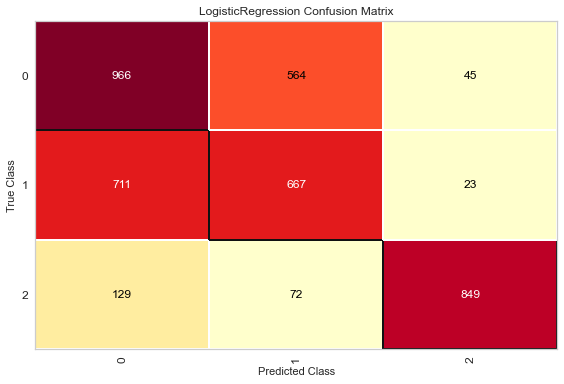

In [411]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(mejor_modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

## Visualizamos la curva ROC AUC del modelo

/Users/jagudo/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


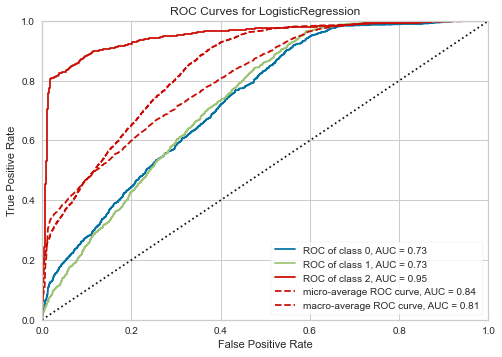

In [415]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(mejor_modelo)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Visualizamos la curva Precision-Recall del modelo

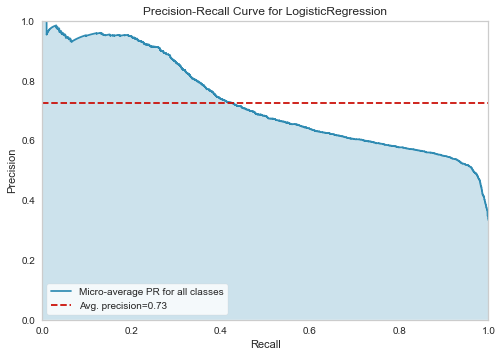

In [414]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(mejor_modelo)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

Vemos que el modelo es realmente bueno al predecir *Methane (CH4)* con las otras dos clases (clase 0 y clase 1) comete más fallos.

Generamos ahora el fichero con la solución para evaluación en Kaggle utilizando nuestro mejor modelo.

In [412]:
generate_submission_file(mejor_modelo, X_sub, 10)

## Analizamos el segundo mejor modelo que hemos encontrado

Con Random Forest, teníamos un F1 score muy cercano al modelo de regresión logística, por lo que vamos a estudiar las características de ese modelo.

### Mostramos la matriz de confusión del modelo para ver cómo de efectivo es

/Users/jagudo/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


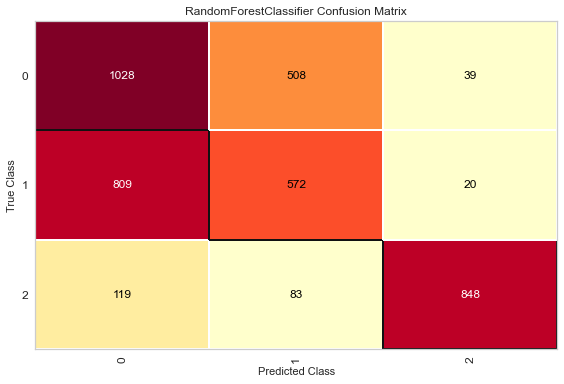

In [421]:
mejor_random_forest = grids['gs_rand_forest'].best_estimator_

cm = ConfusionMatrix(mejor_random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

### Visualizamos la curva ROC AUC del modelo

/Users/jagudo/.pyenv/versions/3.7.0/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


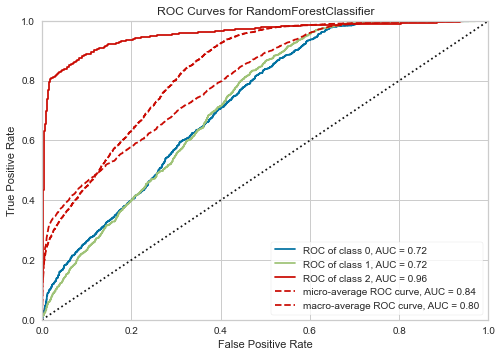

In [420]:
visualizer = ROCAUC(mejor_random_forest)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

### Visualizamos la curva Precision-Recall del modelo

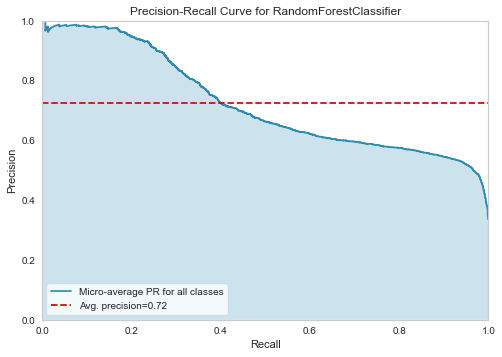

In [418]:
viz = PrecisionRecallCurve(mejor_random_forest)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

Aunque nuestro mejor modelo generado con random forest tiene un F1 score muy similar al mejor modelo generado con regresión logística, podemos ver que el random forest acierta un poco más al predecir *Methane (CH4)*, pero falla más con los otros dos contaminantes. Por lo tanto, podemos decir que es menos generalista que el otro modelo.

Generamos ahora el fichero con la solución para evaluación en Kaggle utilizando el mejor random forest que hemos obtenido.

In [423]:
generate_submission_file(mejor_random_forest, X_sub, 11)

# Resultado final en Kaggle

Al hacer submit en Kaggle, vemos que el modelo de random forest tiene un mejor score, pese a que al calcular nosotros el F1 score nos salía que el modelo con regresión logística era mejor.

Analizando los valores predichos por ambos modelos y viendo el número de ocurrencias de *Methane (CH4)* (valor 2), vemos que el modelo de regresión logística predice más ocurrencias:

In [427]:
mejor_modelo.predict(X_sub).tolist().count(2)

3882

In [428]:
mejor_random_forest.predict(X_sub).tolist().count(2)

3822

Precisamente para *Methane (CH4)* (valor 2), el modelo de random forest hace mejores predicciones, lo que explica que para este conjunto de datos precisamente funcione mejor y, por lo tanto, tenga un score mejor en Kaggle.